In [ ]:
#get all relevant imports
import numpy as np
import matplotlib.pyplot as plt
from overlap_2pz_monte_carlo import mc_overlap_uniform, mc_overlap_importance
np.random.seed(42)

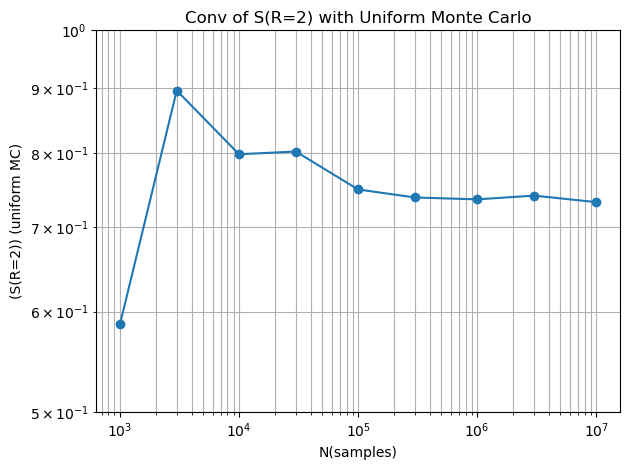

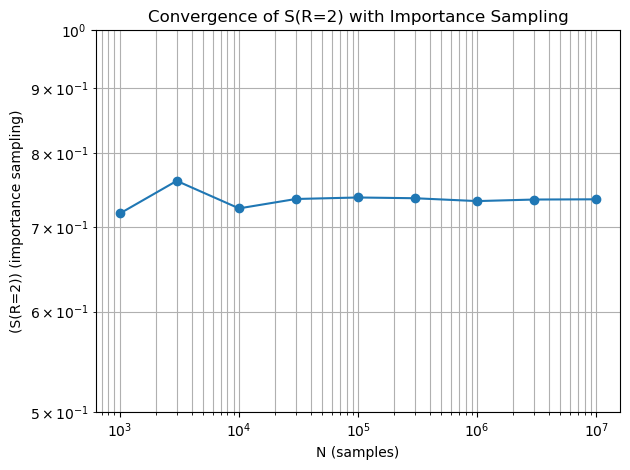

Uniform MC (R=2):
 N=   1,000  S=5.863706e-01
 N=   3,000  S=8.964573e-01
 N=  10,000  S=7.985401e-01
 N=  30,000  S=8.024948e-01
 N= 100,000  S=7.490828e-01
 N= 300,000  S=7.382921e-01
 N=1,000,000  S=7.357358e-01
 N=3,000,000  S=7.407555e-01
 N=10,000,000  S=7.320835e-01

Importance sampling (R=2):
 N=   1,000  S=7.171897e-01
 N=   3,000  S=7.608685e-01
 N=  10,000  S=7.237784e-01
 N=  30,000  S=7.362321e-01
 N= 100,000  S=7.382482e-01
 N= 300,000  S=7.372532e-01
 N=1,000,000  S=7.334383e-01
 N=3,000,000  S=7.355016e-01
 N=10,000,000  S=7.358110e-01


In [ ]:
#function for the convergence plots for uniform and importance sampling
def run_convergence_plots():
    R_demo = 2.0
    L_demo = 20.0
    Ns_uniform = np.array([10**3, 3*10**3, 10**4, 3 * 10**4, 10**5,3*10**5, 10**6, 3*10**6, 10**7], dtype=int)
    Ns_import = np.array([10**3, 3*10**3, 10**4, 3 * 10**4, 10**5, 3*10**5, 10**6, 3*10**6, 10**7], dtype=int)

    # estimates for each N
    S_uniform = [mc_overlap_uniform(R_demo, L_demo, int(N), seed=123) for N in Ns_uniform]
    S_import = []
    SE_import = []
    for N in Ns_import:
        est, se = mc_overlap_importance(R_demo, int(N), scale = 2.0)
        S_import.append(est)
        SE_import.append(se)
    #set up uniform plot
    plt.figure()
    plt.loglog(Ns_uniform, S_uniform, marker='o')
    plt.xlabel('N(samples)')
    plt.ylim(5*10**-1, 1)
    plt.ylabel('(S(R=2)) (uniform MC)')
    plt.title('Conv of S(R=2) with Uniform Monte Carlo')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.savefig('uniform_convergence.png', dpi=150)
    #set up importance plot
    plt.figure()
    plt.loglog(Ns_import, S_import, marker='o')
    plt.ylim(5*10**-1, 1)
    plt.xlabel('N (samples)')
    plt.ylabel('(S(R=2)) (importance sampling)')
    plt.title('Convergence of S(R=2) with Importance Sampling')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.savefig('importance_convergence.png', dpi =150)
    
    plt.show()
    print("Uniform MC (R=2):")
    for N, est in zip(Ns_uniform, S_uniform):
        print(f" N={N:>8,d}  S={est:.6e}")

    print("\nImportance sampling (R=2):")
    for N, est in zip(Ns_import, S_import):
        print(f" N={N:>8,d}  S={est:.6e}") 
run_convergence_plots()



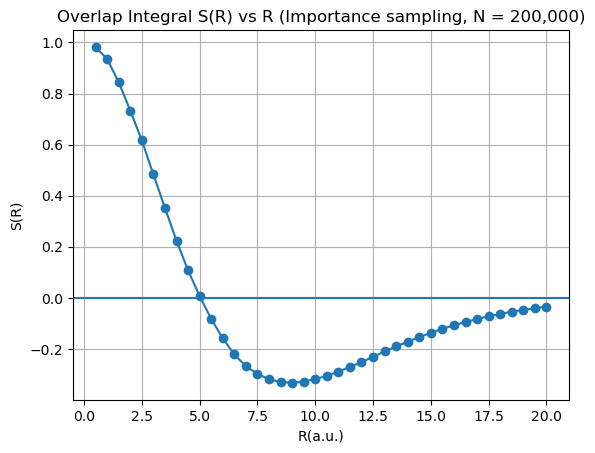

Sign change between R=5.00 and R=5.50 a.u.


In [ ]:
#set up function for plotting final overlap interval with constant N
def run_R_scan(N_fixed: int = 200_000, scale: float = 1.0):
    Rs = np.arange(0.5, 20.0 + 1e-12, 0.5)
    S_vs_R = []
    #use the mc overlap importance function from earlier
    for i, R in enumerate(Rs):
      est, se = mc_overlap_importance(R, int(N_fixed), scale=scale, seed=1234 + i)
      S_vs_R.append(est)
    S_vs_R = np.array(S_vs_R)
    plt.figure()
    plt.plot(Rs, S_vs_R, marker='o')
    plt.xlabel('R(a.u.)')
    plt.ylabel('S(R)')
    plt.title(f'Overlap Integral S(R) vs R (Importance sampling, N = {N_fixed:,})')
    plt.axhline(0.0)
    plt.grid(True)
    plt.show()

    signs = np.sign(S_vs_R)
    for i in range(1, len(signs)):
        if signs[i] != 0 and signs[i - 1] != 0 and signs[i] != signs[i - 1]:
            print(f"Sign change between R={Rs[i-1]:.2f} and R={Rs[i]:.2f} a.u.")
            break
    return Rs, S_vs_R
Rs, S = run_R_scan(N_fixed=200_000, scale=2.0)